# Lab 4

## Before Lab
- Read the Scikit-Learn library documentation that covers Bayes nets: https://scikit-learn.org/
stable/modules/naive_bayes.html#
- The algorithm that we cover in the lectures is implemented as ”Multinomial Naive Bayes” in the
Scikit-Learn. At the very least, you should try to run it this week as part of your Portfolio building.
Allowing for some adaptation to your own code, this will amount to running a bit of code like this:

> ```python
> from sklearn.naive_bayes import MultinomialNB
> model = MultinomialNB(alpha=0.0, class_prior=[0.4, 0.6])
> model.fit(X, Y)
> ```
- Repeat the evaluation steps from the last lab, replacing the classifier you used with the Bayes net. Check:
does it have better performance in any of the evaluation metrics?
- (optional for BSc, Mandatory for MSc) Study other Bayes net algorithms given in Scikit-Learn:
    * Gaussian Naive Bayes
    * Complement Naive Bayes
    * Bernoulli Naive Bayes
    * Categorical Naive Bayes
Again, use the standard evaluation metrics to see whether any of these algorithms bring improvement to
either overall accuracy or one of the evaluation metrics.
- (hard, optional) There are several implementations of complex Bayes Nets (i.e. Bayes nets with complex
hierarchical structure) available on-line.
Investigate whether any of these libraries can work with your data sets, and whether this brings any
improvement. Note: complex Bayes nets can show non-trivial dependencies among features. So, they may
have better explanatory power. 

## During Lab
- Share your proposed solutions, discuss which Bayes net implementations and which evaluation metrics
worked best. If some worked better, can you hypothesise why?
- Within the Portfolio text, fill in the table
- In the table, highlight with bold the best performing algorithms in each category.
- Make conclusions. You will get more marks for more interesting and “out of the box” questions and
answers.

## After
- Group rep: Make sure all group members have tasks for the week
- Everyone: Incorporate the discussion during the lab into your Python code
- Everyone: Incorporate all code used in the lab into your Portfolio repository.

# Imports 

In [1]:
# conda env create -f env.yaml 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df3 = pd.read_csv("Data/data3.csv")
df4 = pd.read_csv("Data/data4.csv")

# Statistical Summary and Correlation

In [3]:
df3.describe()

,failures,higher,studytime,Medu,Fedu,Dalc,age,reason_reputation,school,address,internet,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.264368,0.914751,1.970307,2.603448,2.387931,1.494253,16.726054,0.237548,0.260536,0.272989,0.792146,11.341954
std,0.656142,0.279386,0.834353,1.124907,1.099938,0.911714,1.239975,0.425785,0.439138,0.445708,0.405967,3.864796
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,16.000000,0.000000,0.000000,0.000000,1.000000,10.000000
50%,0.000000,1.000000,2.000000,3.000000,2.000000,1.000000,17.000000,0.000000,0.000000,0.000000,1.000000,11.000000
75%,0.000000,1.000000,2.000000,4.000000,3.000000,2.000000,18.000000,0.000000,1.000000,1.000000,1.000000,14.000000
max,3.000000,1.000000,4.000000,4.000000,4.000000,5.000000,22.000000,1.000000,1.000000,1.000000,1.000000,20.000000


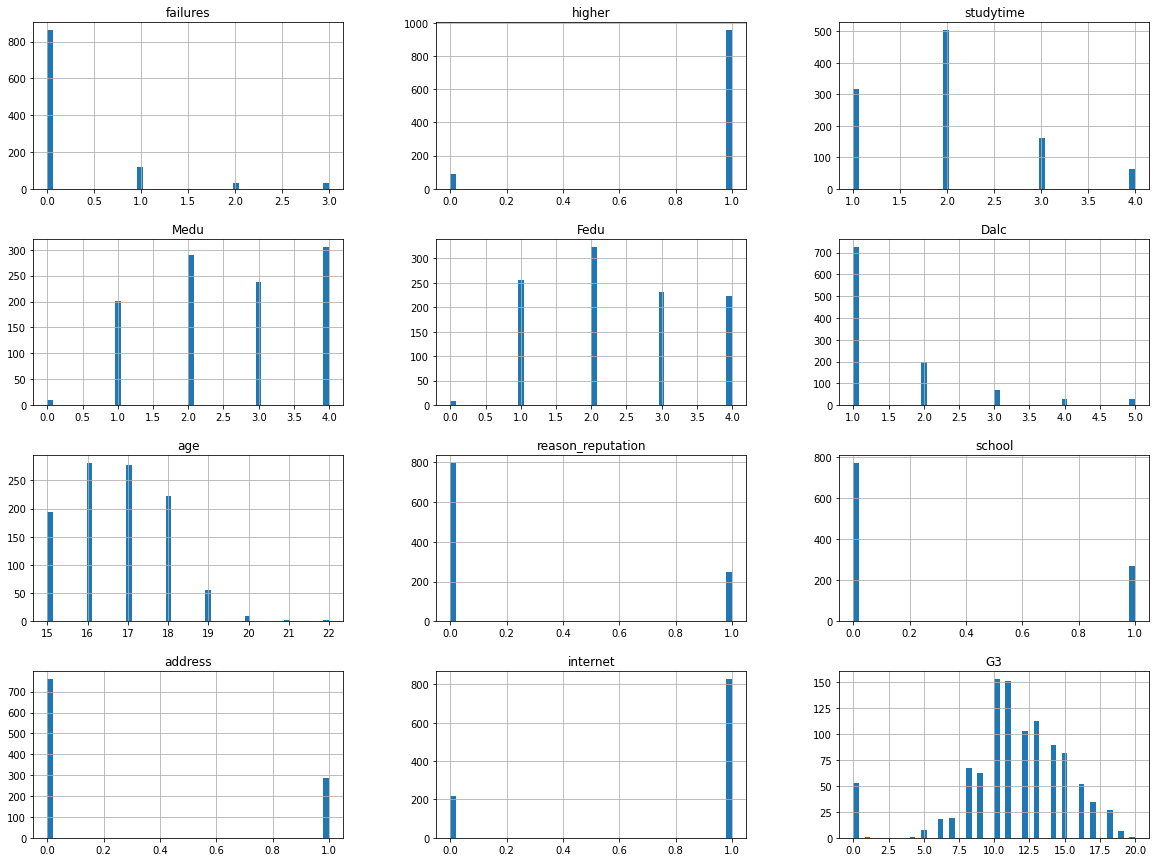

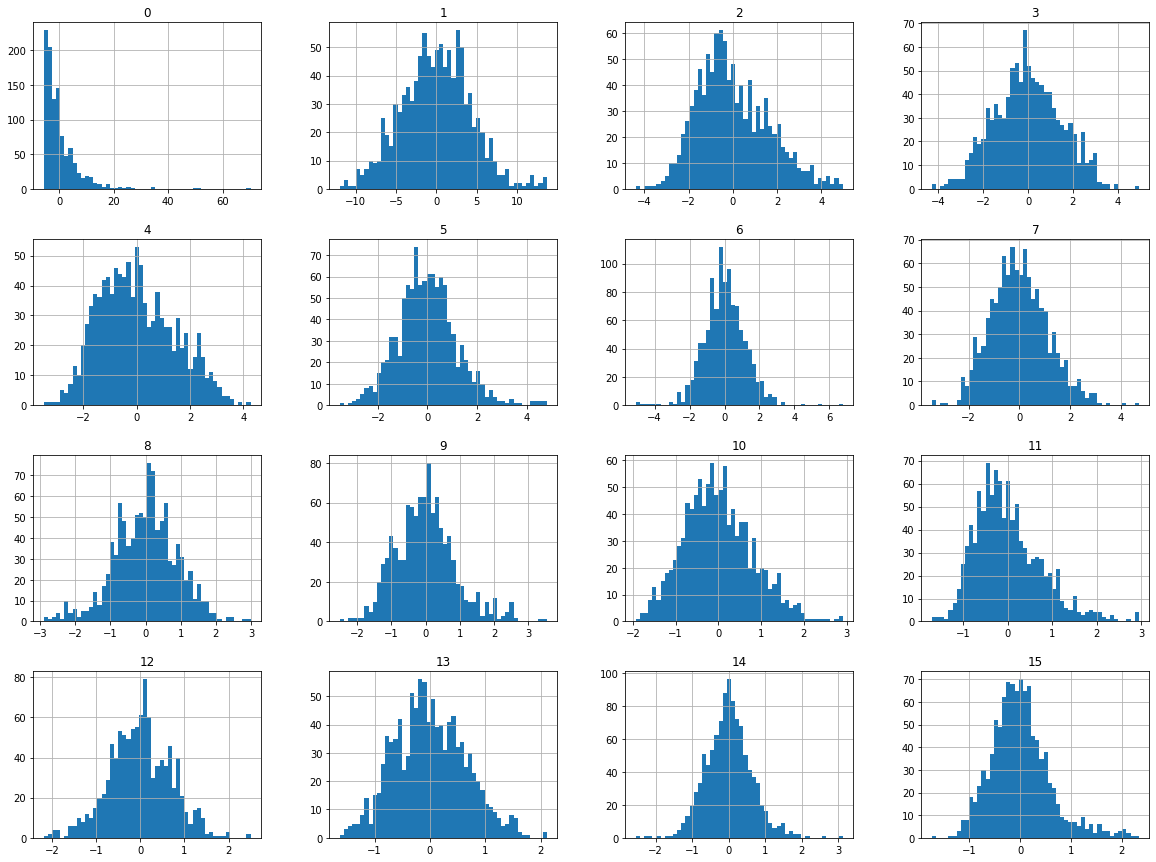

In [4]:
df3.hist(bins=50, figsize=(20,15))
plt.show()
df4.hist(bins=50, figsize=(20,15))
plt.show()

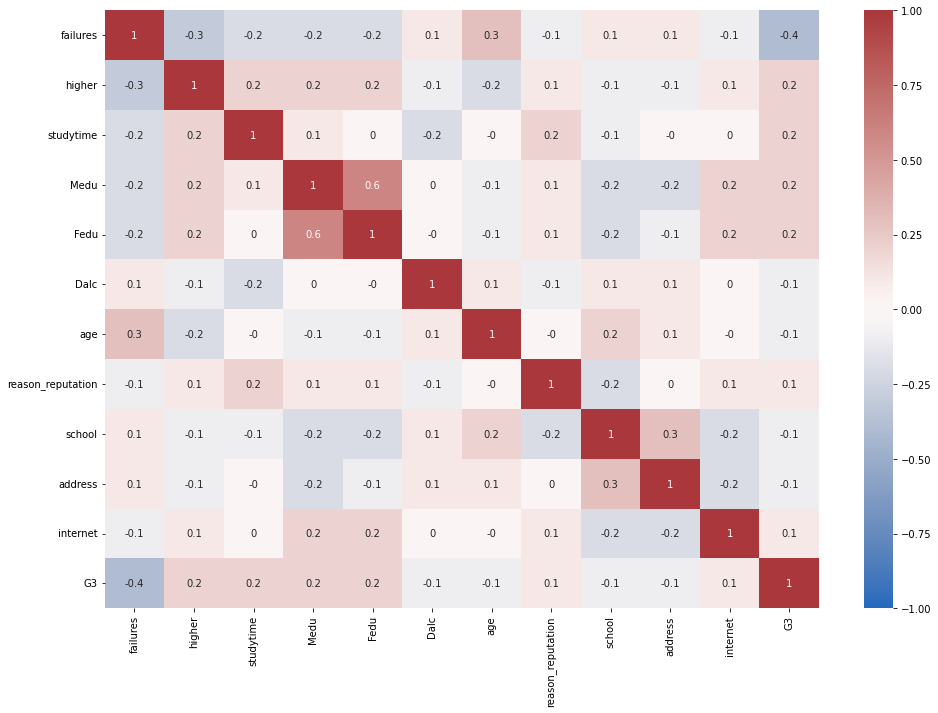

In [5]:
corr_matrix = df3.corr().round(1)

# Resizing the heatmap
fig, ax = plt.subplots(figsize=(16,11))

sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax=ax)
plt.show()

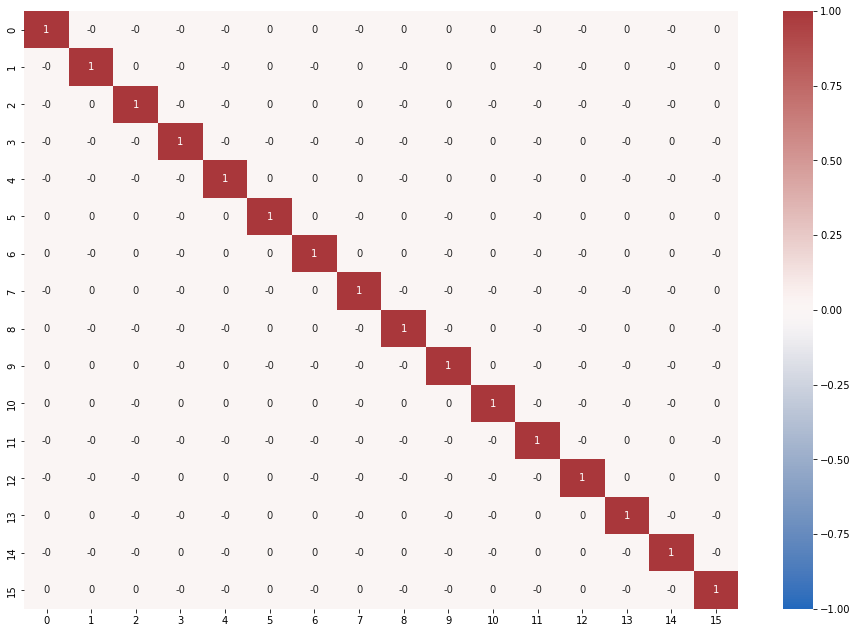

In [8]:
corr_matrix = df4.corr().round(1)

# Resizing the heatmap
fig, ax = plt.subplots(figsize=(16,11))

sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax=ax)
plt.show()

# Modelling and Testing

In [69]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve, plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, BernoulliNB, CategoricalNB

In [10]:
# Set df to the dataframe you want to train and test
df = df3

In [60]:
features = df.iloc[:, :-1]

target = (df["G3"]<10).to_numpy().reshape(-1,1).flatten()

In [73]:
def showMetrics(x_test, model):
    predicted = model.predict(x_test)

    #I obtain the confusion matrix
    cm = confusion_matrix(y_test, predicted)

    FP = cm[1,0]
    FN = cm[0,1]
    TP = cm[0,0]
    TN = cm[1,1]

    # accuracy, TP rate, FP rate, precision, recall, F measure, the ROC

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print("Overall accuracy: ", ACC)

    # TP rate
    TPR = TP/(TP+FN)
    print("recall: ", TPR)

    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    print("Fall out or false positive rate", FPR)

    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    print("Precision", PPV)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    print("Recall: ", TPR)

    # F-measure
    FM = (2*TPR*PPV)/(TPR+PPV)
    print("F-measure: ", TPR)

    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    print("True negative rate", TNR)

    # Negative predictive value
    NPV = TN/(TN+FN)
    print("Negative predictive value", NPV)

    # False negative rate
    FNR = FN/(TP+FN)
    print("False negative rate", FNR)

    # False discovery rate
    FDR = FP/(TP+FP)
    print("False discovery rate", FDR)

    # ROC curve (true positive / false positive)
    plot_roc_curve(model, x_test, y_test)



In [74]:
(x_train, x_test, y_train, y_test) = train_test_split(features, target, test_size=0.25)

Overall accuracy:  0.6551724137931034
recall:  0.6862745098039216
Fall out or false positive rate 0.45614035087719296
Precision 0.8433734939759037
Recall:  0.6862745098039216
F-measure:  0.6862745098039216
True negative rate 0.543859649122807
Negative predictive value 0.3263157894736842
False negative rate 0.3137254901960784
False discovery rate 0.1566265060240964


c:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


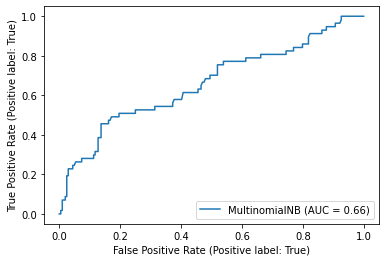

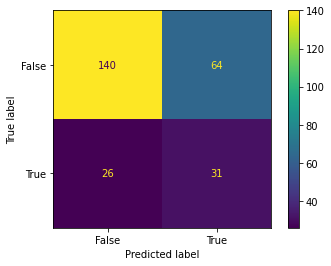

In [75]:
model = MultinomialNB(alpha=0.0, class_prior=[0.4, 0.6])
model.fit(x_train, y_train)

showMetrics(x_test, model)
plot_confusion_matrix(model, x_test, y_test)

Overall accuracy:  0.7969348659003831
recall:  0.9313725490196079
Fall out or false positive rate 0.6842105263157895
Precision 0.8296943231441049
Recall:  0.9313725490196079
F-measure:  0.9313725490196079
True negative rate 0.3157894736842105
Negative predictive value 0.5625
False negative rate 0.06862745098039216
False discovery rate 0.1703056768558952


c:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


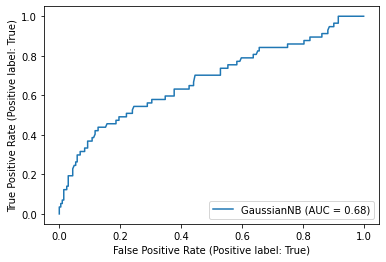

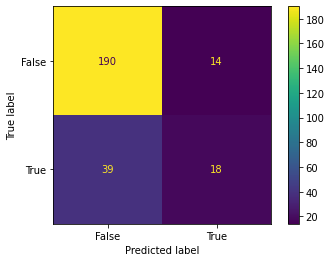

In [76]:
model = GaussianNB()
model.fit(x_train, y_train)

showMetrics(x_test, model)
plot_confusion_matrix(model, x_test, y_test)

Overall accuracy:  0.7586206896551724
recall:  0.8382352941176471
Fall out or false positive rate 0.5263157894736842
Precision 0.8507462686567164
Recall:  0.8382352941176471
F-measure:  0.8382352941176471
True negative rate 0.47368421052631576
Negative predictive value 0.45
False negative rate 0.16176470588235295
False discovery rate 0.14925373134328357


c:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


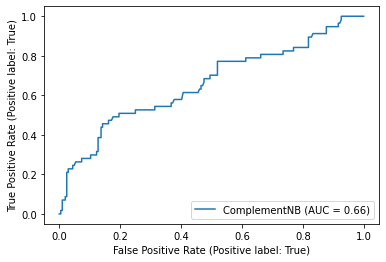

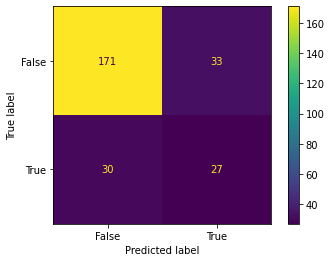

In [77]:
model = ComplementNB()
model.fit(x_train, y_train)

showMetrics(x_test, model)
plot_confusion_matrix(model, x_test, y_test)

Overall accuracy:  0.789272030651341
recall:  0.9264705882352942
Fall out or false positive rate 0.7017543859649122
Precision 0.8253275109170306
Recall:  0.9264705882352942
F-measure:  0.9264705882352942
True negative rate 0.2982456140350877
Negative predictive value 0.53125
False negative rate 0.07352941176470588
False discovery rate 0.17467248908296942


c:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


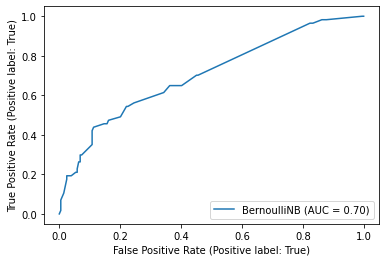

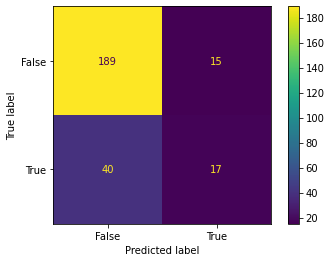

In [78]:
model = BernoulliNB()
model.fit(x_train, y_train)

showMetrics(x_test, model)
plot_confusion_matrix(model, x_test, y_test)

Overall accuracy:  0.789272030651341
recall:  0.9215686274509803
Fall out or false positive rate 0.6842105263157895
Precision 0.8281938325991189
Recall:  0.9215686274509803
F-measure:  0.9215686274509803
True negative rate 0.3157894736842105
Negative predictive value 0.5294117647058824
False negative rate 0.0784313725490196
False discovery rate 0.17180616740088106


c:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


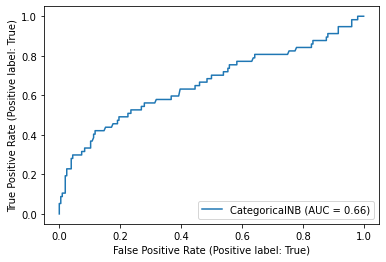

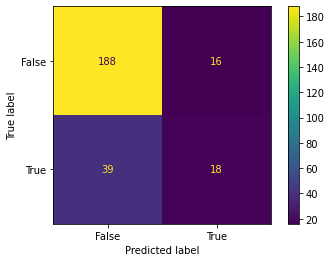

In [79]:
model = CategoricalNB()
model.fit(x_train, y_train)

showMetrics(x_test, model)
plot_confusion_matrix(model, x_test, y_test)

In [30]:
kf = KFold(10)
model = KNeighborsClassifier(n_neighbors=10)
accuracies = []
for train_index, test_index in kf.split(features,):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = target[train_index], target[test_index]
    model.fit(X_train, y_train.ravel())
    predicted = model.predict(x_test)
    accuracies.append(np.mean(y_test == predicted))

print("Accuracies:", accuracies)
print("Final averaged accuracy:",np.mean(accuracies)*100,"%")


Accuracies: [0.7428571428571429, 0.6190476190476191, 0.6761904761904762, 0.7142857142857143, 0.9615384615384616, 0.8653846153846154, 0.8942307692307693, 0.9423076923076923, 0.7019230769230769, 0.6826923076923077]
Final averaged accuracy: 78.00457875457876 %


In [31]:
np.max(accuracies)-np.min(accuracies)

0.3424908424908425